# Comparaison sur une sinusoïde

Mise en oeuvre de réseau récurrents sur un exemple.

## La série temporelle

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM

In [13]:
N = 5000    
Tp = 4000    

In [14]:
t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df = pd.DataFrame(x)
df.head()

,0
0,1.826152
1,1.416754
2,1.571001
3,1.285012
4,0.544118


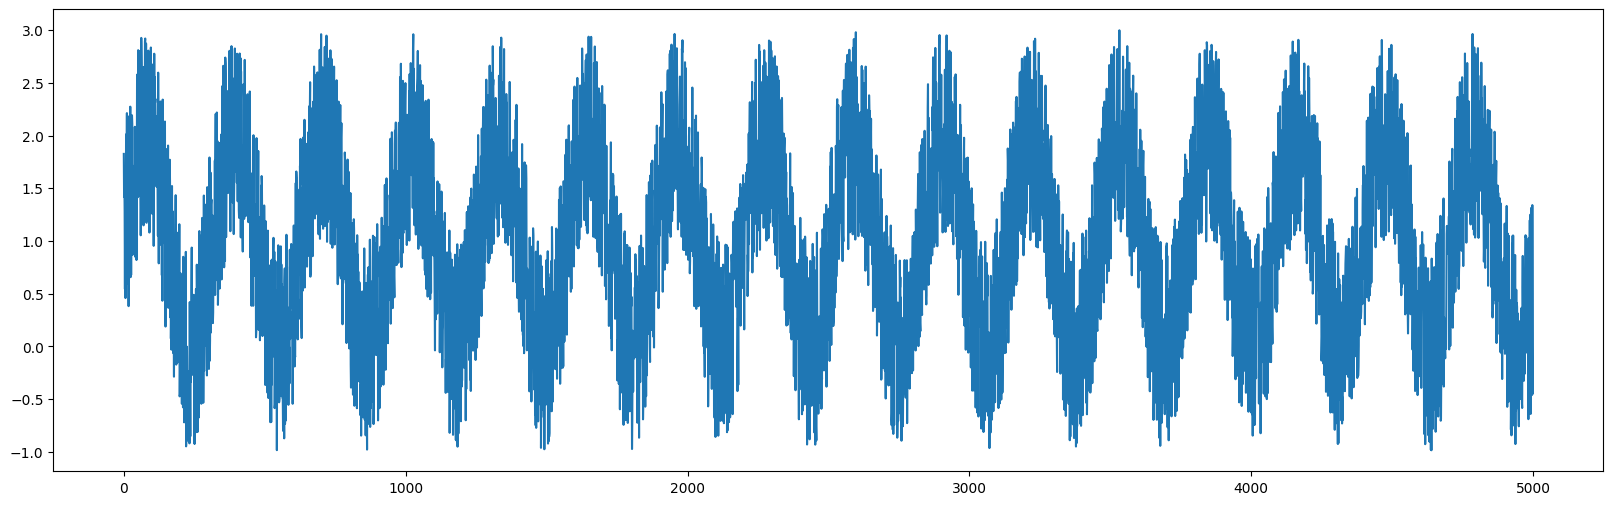

In [15]:
plt.figure(figsize=(20, 6))
plt.plot(df)
plt.show() 

In [16]:
values=df.values
train,test = values[0:Tp,:], values[Tp-1000:N,:]
test.shape

(2000, 1)

In [17]:
ltrain = 1000
lpredict = 100

In [18]:
def convertToMatrix(data, ltrain, lpredict):
 X, Y =[], []
 for i in range(len(data)-ltrain-lpredict):
  d=i+ltrain  
  X.append(data[i:d,])
  Y.append(data[d:d+lpredict,])
 return np.array(X), np.array(Y)

trainX,trainY =convertToMatrix(train,ltrain, lpredict)
testX,testY =convertToMatrix(test,ltrain, lpredict)
testX.shape

(900, 1000, 1)

In [19]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape

(2900, 1, 1000)

In [33]:
model =Sequential()
model.add(Dense(50, kernel_initializer='normal',activation="sigmoid"))
model.add(Dense(20, kernel_initializer='normal',activation="sigmoid"))
model.add(Dense(lpredict,kernel_initializer='normal', activation="linear"))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
#model.summary()


In [36]:
model.fit(trainX,trainY, epochs=200, batch_size=2900, verbose=2)

Epoch 1/200
1/1 - 0s - loss: 0.7971 - 434ms/epoch - 434ms/step
Epoch 2/200
1/1 - 0s - loss: 0.7859 - 399ms/epoch - 399ms/step
Epoch 3/200
1/1 - 1s - loss: 0.7751 - 555ms/epoch - 555ms/step
Epoch 4/200
1/1 - 0s - loss: 0.7647 - 451ms/epoch - 451ms/step
Epoch 5/200
1/1 - 1s - loss: 0.7551 - 525ms/epoch - 525ms/step
Epoch 6/200
1/1 - 1s - loss: 0.7460 - 559ms/epoch - 559ms/step
Epoch 7/200
1/1 - 0s - loss: 0.7374 - 276ms/epoch - 276ms/step
Epoch 8/200
1/1 - 0s - loss: 0.7292 - 264ms/epoch - 264ms/step
Epoch 9/200
1/1 - 0s - loss: 0.7212 - 276ms/epoch - 276ms/step
Epoch 10/200
1/1 - 0s - loss: 0.7132 - 262ms/epoch - 262ms/step
Epoch 11/200
1/1 - 0s - loss: 0.7047 - 278ms/epoch - 278ms/step
Epoch 12/200
1/1 - 0s - loss: 0.6956 - 257ms/epoch - 257ms/step
Epoch 13/200
1/1 - 0s - loss: 0.6871 - 269ms/epoch - 269ms/step
Epoch 14/200
1/1 - 0s - loss: 0.6791 - 271ms/epoch - 271ms/step
Epoch 15/200
1/1 - 0s - loss: 0.6710 - 274ms/epoch - 274ms/step
Epoch 16/200
1/1 - 0s - loss: 0.6630 - 291ms/epoc

In [37]:
trainPredict = model.predict(trainX)
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore) 

91/91 [==============================] - 0s 2ms/step
0.4841403663158417


In [38]:
Predict = values[0:Tp,:]

for end in range(Tp,N,100):
    Calc=[];
    Calc.append(Predict[end-ltrain:end]);
    Calc = np.array(Calc);
    Calc = np.reshape(Calc, (Calc.shape[0], 1, Calc.shape[1]));
    res=model.predict(Calc);
    Predict=np.concatenate((Predict, res), axis=None);
Predict.shape

1/1 [==============================] - 0s 47ms/step


(5000,)

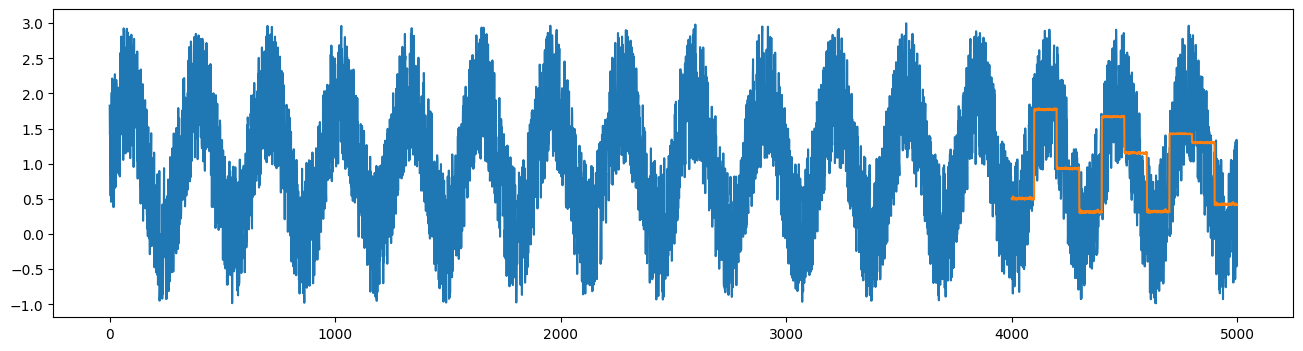

In [39]:
plt.figure(figsize=(16, 4))
index = df.index.values[4000:5000]
plt.plot(df)
plt.plot(index,Predict[4000:5000])
#plt.axvline(df.index[Tp], c="r")
plt.show() 

In [40]:
# SimpleRNN model
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,ltrain), activation="relu"))
model.add(Dense(80, activation="relu")) 
model.add(Dense(lpredict))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                33056     
                                                                 
 dense_9 (Dense)             (None, 80)                2640      
                                                                 
 dense_10 (Dense)            (None, 100)               8100      
                                                                 
Total params: 43,796
Trainable params: 43,796
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(trainX,trainY, epochs=10, batch_size=1000, verbose=2)

Epoch 1/10
3/3 - 2s - loss: 1.9376 - 2s/epoch - 527ms/step
Epoch 2/10
3/3 - 0s - loss: 1.3544 - 63ms/epoch - 21ms/step
Epoch 3/10
3/3 - 0s - loss: 1.0506 - 59ms/epoch - 20ms/step
Epoch 4/10
3/3 - 0s - loss: 0.8670 - 52ms/epoch - 17ms/step
Epoch 5/10
3/3 - 0s - loss: 0.7552 - 64ms/epoch - 21ms/step
Epoch 6/10
3/3 - 0s - loss: 0.6482 - 50ms/epoch - 17ms/step
Epoch 7/10
3/3 - 0s - loss: 0.5883 - 58ms/epoch - 19ms/step
Epoch 8/10
3/3 - 0s - loss: 0.5586 - 62ms/epoch - 21ms/step
Epoch 9/10
3/3 - 0s - loss: 0.5308 - 57ms/epoch - 19ms/step
Epoch 10/10
3/3 - 0s - loss: 0.5100 - 59ms/epoch - 20ms/step


In [42]:
trainPredict = model.predict(trainX)

91/91 [==============================] - 0s 2ms/step


In [43]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore) 

0.5051042437553406


In [44]:
Predict = values[0:Tp,:]

for end in range(Tp,N,100):
    Calc=[];
    Calc.append(Predict[end-ltrain:end]);
    Calc = np.array(Calc);
    Calc = np.reshape(Calc, (Calc.shape[0], 1, Calc.shape[1]));
    res=model.predict(Calc);
    Predict=np.concatenate((Predict, res), axis=None);
Predict.shape

1/1 [==============================] - 0s 30ms/step


(5000,)

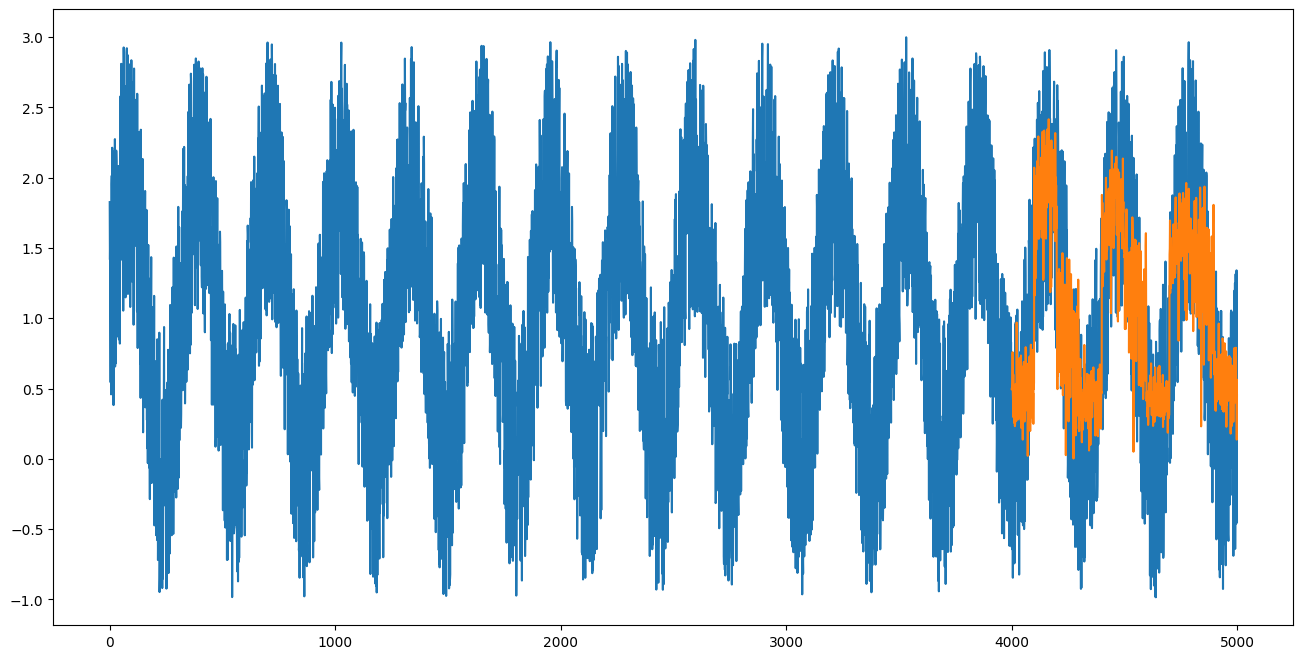

In [45]:
plt.figure(figsize=(16, 8))
index = df.index.values[4000:5000]
plt.plot(df)
plt.plot(index,Predict[4000:5000])
#plt.axvline(df.index[Tp], c="r")
plt.show() 

In [51]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(100, input_shape=(1, ltrain)))
model.add(Dense(100))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               440400    
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
Total params: 450,500
Trainable params: 450,500
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(trainX, trainY, epochs=100, batch_size=1000, verbose=2)

Epoch 1/100
3/3 - 2s - loss: 1.6567 - 2s/epoch - 792ms/step
Epoch 2/100
3/3 - 0s - loss: 1.2665 - 140ms/epoch - 47ms/step
Epoch 3/100
3/3 - 0s - loss: 1.0406 - 138ms/epoch - 46ms/step
Epoch 4/100
3/3 - 0s - loss: 0.8921 - 144ms/epoch - 48ms/step
Epoch 5/100
3/3 - 0s - loss: 0.7728 - 133ms/epoch - 44ms/step
Epoch 6/100
3/3 - 0s - loss: 0.6675 - 151ms/epoch - 50ms/step
Epoch 7/100
3/3 - 0s - loss: 0.5886 - 148ms/epoch - 49ms/step
Epoch 8/100
3/3 - 0s - loss: 0.5328 - 139ms/epoch - 46ms/step
Epoch 9/100
3/3 - 0s - loss: 0.4934 - 137ms/epoch - 46ms/step
Epoch 10/100
3/3 - 0s - loss: 0.4650 - 146ms/epoch - 49ms/step
Epoch 11/100
3/3 - 0s - loss: 0.4445 - 139ms/epoch - 46ms/step
Epoch 12/100
3/3 - 0s - loss: 0.4289 - 140ms/epoch - 47ms/step
Epoch 13/100
3/3 - 0s - loss: 0.4167 - 135ms/epoch - 45ms/step
Epoch 14/100
3/3 - 0s - loss: 0.4066 - 148ms/epoch - 49ms/step
Epoch 15/100
3/3 - 0s - loss: 0.3980 - 144ms/epoch - 48ms/step
Epoch 16/100
3/3 - 0s - loss: 0.3904 - 137ms/epoch - 46ms/step
Epo

In [53]:
Predict = values[0:Tp,:]

for end in range(Tp,N,100):
    Calc=[];
    Calc.append(Predict[end-ltrain:end]);
    Calc = np.array(Calc);
    Calc = np.reshape(Calc, (Calc.shape[0], 1, Calc.shape[1]));
    res=model.predict(Calc);
    Predict=np.concatenate((Predict, res), axis=None);
Predict.shape

1/1 [==============================] - 0s 24ms/step


(5000,)

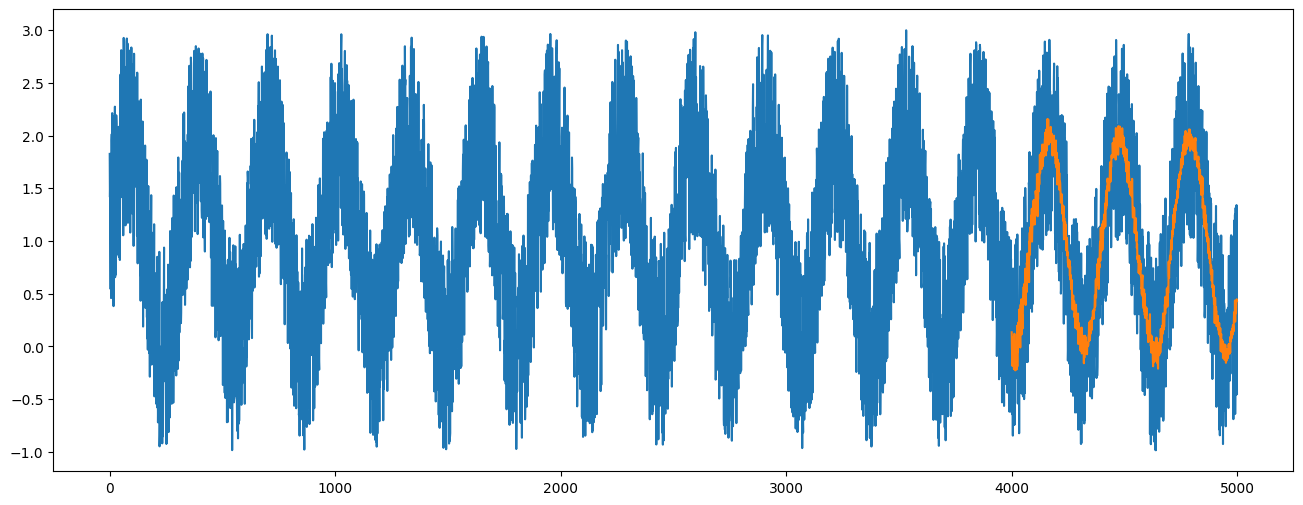

In [54]:
plt.figure(figsize=(16, 6))
index = df.index.values[4000:5000]
plt.plot(df)
plt.plot(index,Predict[4000:5000])
#plt.axvline(df.index[Tp], c="r")
plt.show() 